# Spring 2021  BBM 409:Introduction to Machine Learning Lab. Assignment 1
### Instructor: Erkut Erdem TA: Necva Bölücü Due on 19 March, 2021 (23:59:59)
Gamze Deniz 21996126

**Part I: Theory Questions
k-Nearest Neighbor Classification**

**1)**
**a)** The k-NN is 1 so the closest point to x is positive in both samples beacuse the label of x is positive in both samples. In the union of these two samples the closest point will be either Sample 1's or Sample 2's closest point to x which means x's label is again positive. I skecthed an example such that in the union of those samples the closest point to x is Sample 2's closest point, but it could have been Sample 1's closest point and the result would have been the same.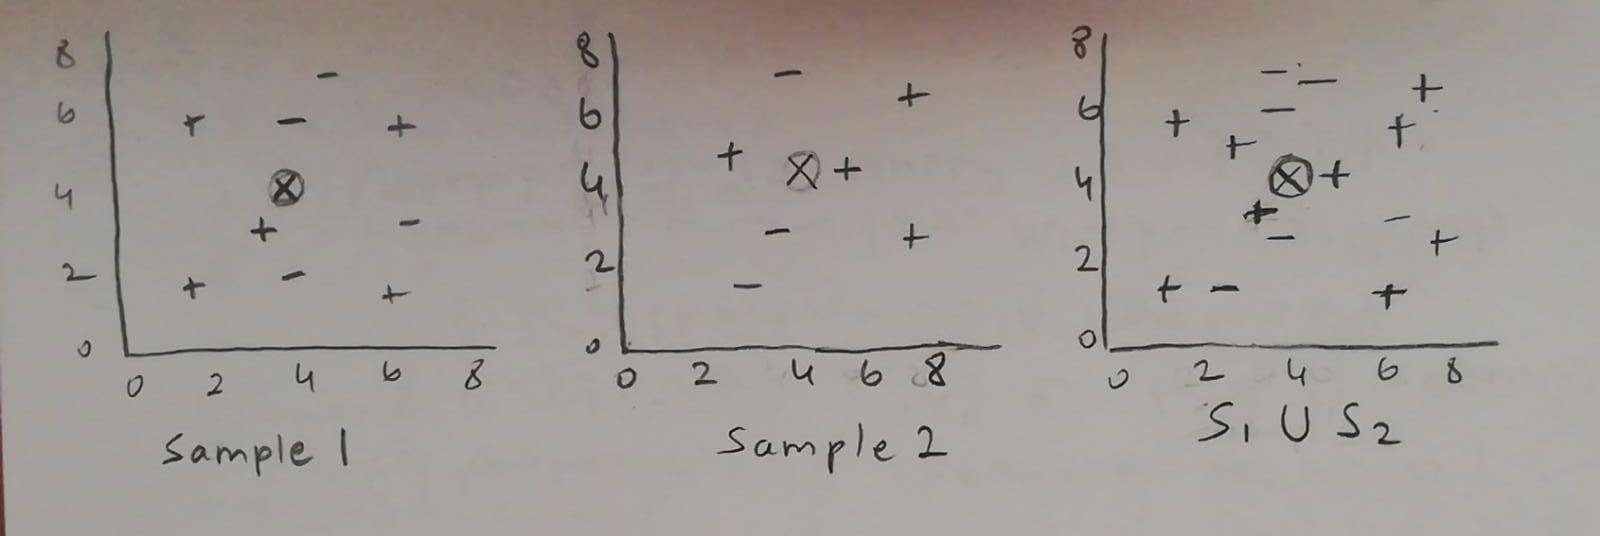

**b)** There could be such samples that majority of the closest labels are positive out of the 3 closest points since k-NN is 3 but there is 1 negative label that closer to x than those positive labels and in the union of these samples, the closest 2 points would be those negative points which means negative labels get the majority and x's label would be negative. The skecth of the example I mentioned: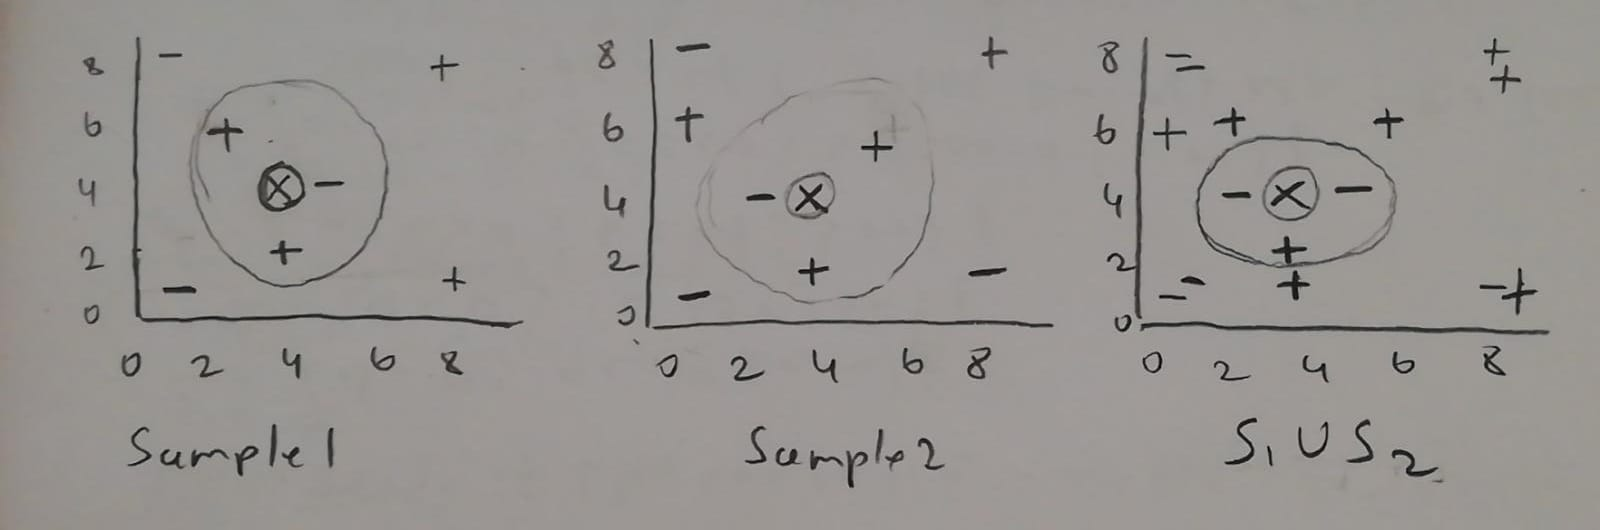

**2)**

**a)** Closest point to a point can be itself, meaning the neighbour of a point can be itself. Therefore, when k=0 it minimizes the training set error. The error becomes 0. Since the k is 0, we can't calculate the error because there is nothing to compare.


**b)** When k = 5,  while using leave-one-out cross-validation error is minimalized. The error becomes 4/14. Becaue it trains and validates the model for all possible combinations, it also lessens overfitting. And to find the best parameters for our problem when needed, in cross validation it is done by trying different values and choosing the best ones since we split the set into 3 parts as test, train and validation set.


**c)** For big value for k such as 13; while using leave one outcross validation, every data point gets misclassified. For too small values for k will lead to overfitting problem.

**d)** 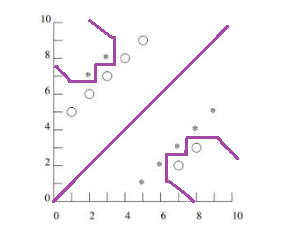

**Linear Regression**

**1)** X has m rows and n + 1 columns, the +1 comes from the x0=1 term. Therefore X is 23 x 5.
y is an m vector. Therefore, y is 23 x 1.
θ is an (n+1) vector. Therefore, y is 6 x 1.

**2)** (XTX)−1 would be very slow to compute in the normal equation so choosing gradient descent makes more sense. Since there are 200000 features, I would have to invert a 200001 x 200001 matrix to compute the normal equation and inverting such a large matrix is expensive in the sense of computation.

**3)** Answer is C. Because feature scaling speeds up gradient descent by avoiding many required extra iterations, when one or more features take on much larger values than the rest.

### PART II: Classification of Images

Our aim was to classify images based on the features we extracted, with k-fold cross-validation method using k-NN and weighted k-NN algorithms. I used Gabor, Canny and resized the images to compare their Tiny images.

In [ ]:
def tinyimage(image, size=(32, 32)):
	# resize the image to a fixed size, then flatten the image into
	# a list of raw pixel intensities
	return cv2.resize(image, size).flatten()

I import this code from my filter.py to resize the image and get Tiny Image, I also use flatten function to return the 1D vector of that numpy array.

In [ ]:
def Gabor_process(img):
    ...
    out = out.flatten() #to1Dvector
    return out

def Canny_edge(img):
	# Canny Edge
    imgCopy = np.uint8(img)
    canny_edges = cv2.Canny(imgCopy,100,200)
    return canny_edges.flatten() #to1Dvector

As a difference from the filter.py that we were provided I flatten the numpy array to get the 1D vector and return that value in the Gabor Process, same with Canny Process.

In the main.py I firstly change image sizes to 256 x 256 since Covid images are 256 x 256 and the numpy array shapes have to be equal. Then I store the extracted vector values into an list of arrays but if it is a Gabor process I save it into a csv file then read that file and save into a list of arrays. This way I run many tests easily since the first extracting process takes so much time.

In [ ]:
#for saving each classes's gabor feature arrays
save_gabor("train\\NORMAL","NORMAL")
save_gabor("train\\COVID","COVID")
save_gabor("train\\Viral Pneumonia","Viral Pneumonia")

#for tiny and canny features extract arrays
read_images("train\\NORMAL","NORMAL")
read_images("train\\COVID","COVID")
read_images("train\\Viral Pneumonia","Viral Pneumonia")

#read from saved file to gabor list
read_file("NORMAL")
read_file("COVID")
read_file("Viral Pneumonia")

In [ ]:
def crossvalidation (k,train,label,knn)

Then inside the crossvalidation function I divide the train set into blocks by the given k fold value. <br>I iterate over blocks k times and each time a block becomes the validation set/test set and the rest is train set. <br>I calculate the distance between each point and the sample from the test set. I look through for each point in the test set. <br>For the final prediction I get the results for various k values for both k-NN and weighted k-NN.<br>
For k-NN I calculate the ecludian distance and find the closest first k points and majority of those points's label is my prediction. <br>
For weighted k-NN I calculate the ecludian distance then  find the closest first k points and then for weight=1/distance I get the summation of each class's weight, the class which has the biggest one will be the prediction for the label.

In [ ]:
prediction=predict(x_trainset,y_trainset,x_testset[i],knn) #for knn
#prediction=weightedprediction(x_trainset,y_trainset,x_testset[i],5) #for weighted knn

For the simplicity, I run tests with only choosing k-NN prediction or weighted k-NN prediction since it takes so much time. During the process I also printed out some missclassfied images with their index number, prediction and the true label.

- I used various k values for botk k-NN and k fold to find the optimum.

>For all the images, I kindly ask you to open them in the new tab to see them clearly.

## The Accuracy results of Gabor:
**For each iteration and Mean Accuracy:**

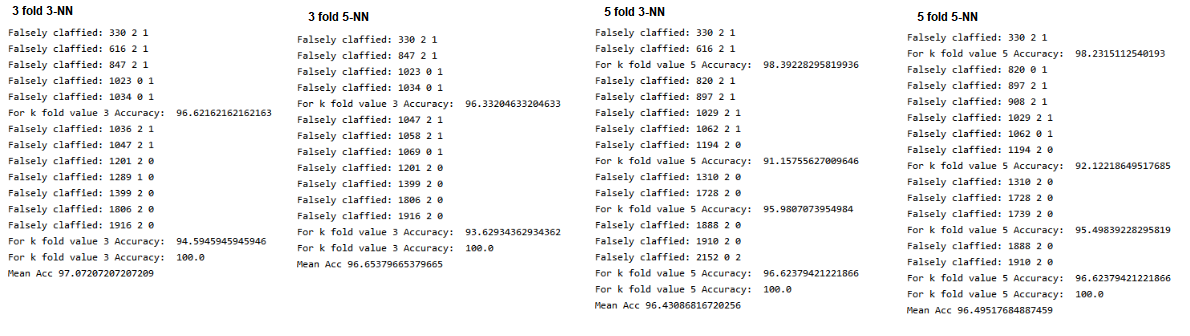

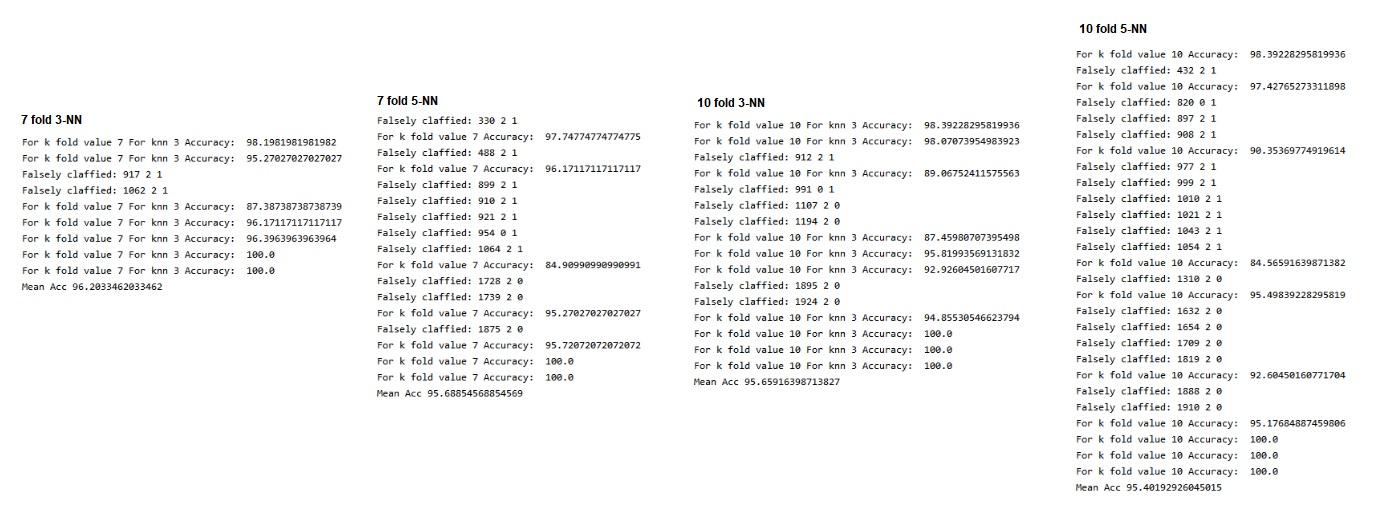

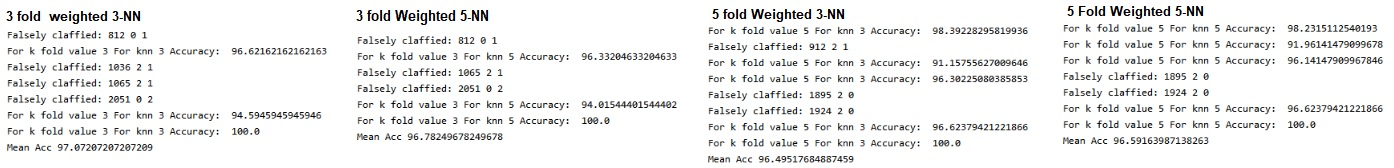

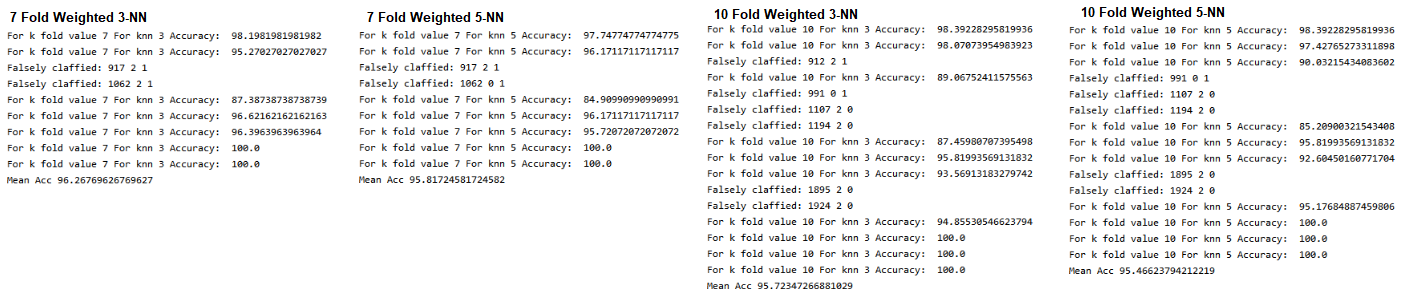

## Error Analysis

Even though the overall Accuracy I got is good; 
- For time complexity, compared to other features Gabor takes so much more time to extract features.<br><br>
About k-NN distance calculations looking at Accuracy values;<br><br>
- For a fixed k fold value if the k-NN's k value increases, Accuracy slightly decreases.
- For a fixed k-NN k value if the k fold value increases, Accuracy slightly decreases.

About Weighted k-NN distance calculations looking at Accuracy values;<br><br>
- For a fixed k fold value if the k-NN's k value increases, Accuracy slightly decreases.
- For a fixed k-NN k value if the k fold value increases, Accuracy slightly decreases.

For this part Covid is labeled as 0, Normal 1, Viral Phenomia 2. It is also apparent that Gabor mostly confuses Viral Phenomia images with Covid images. Since the images are grayscaled and both in Covid and in Viral Phenomia images's the density increases especially around rib cage so the images's texture are mostly similar so that's why I think Gabor confuses them with each other.

For Gabor 3 Fold 3-NN looks optimum, weighted or not doesn't matter much.

## The Accuracy results of Tiny Images:
**For each iteration and Mean Accuracy:**

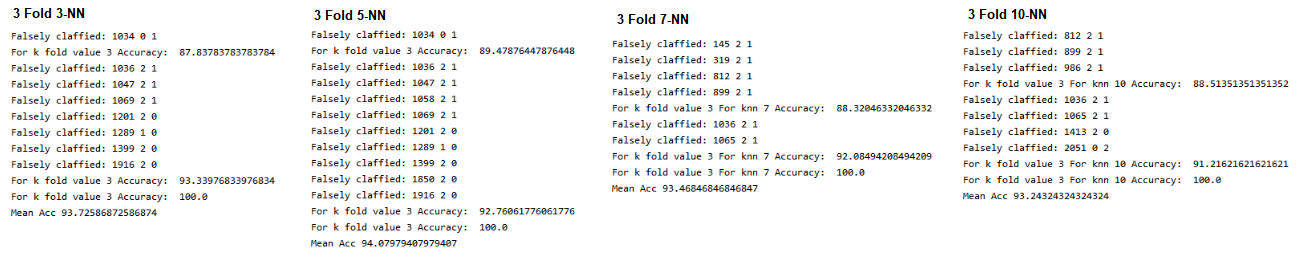

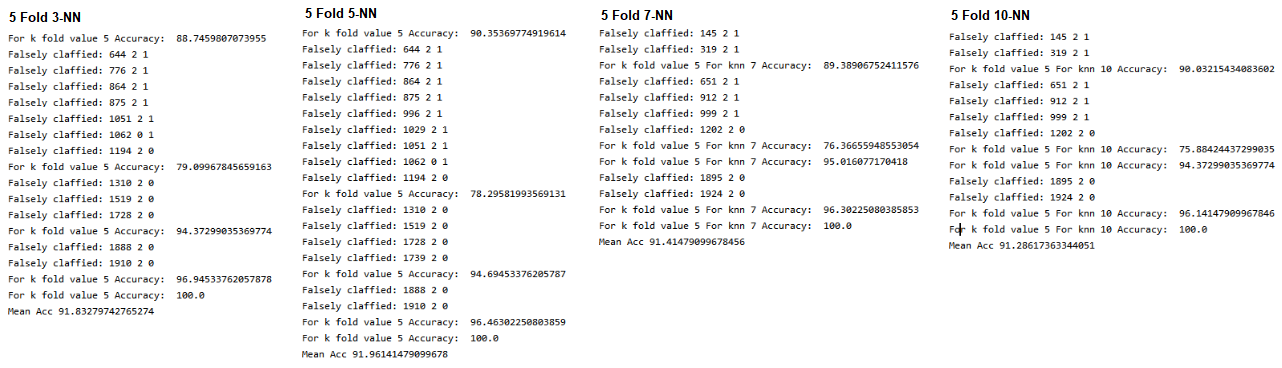

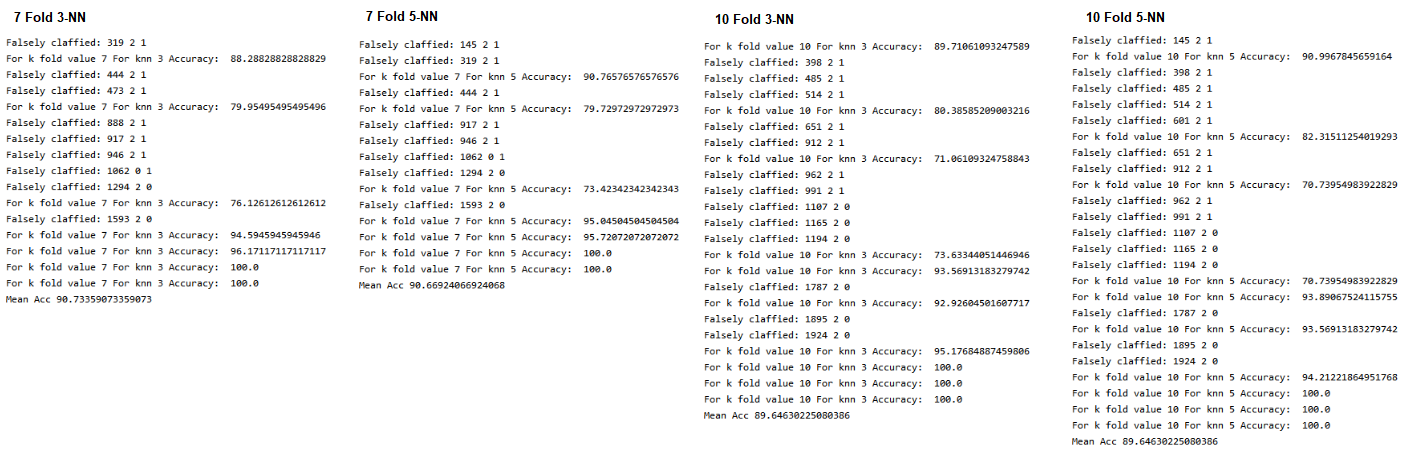

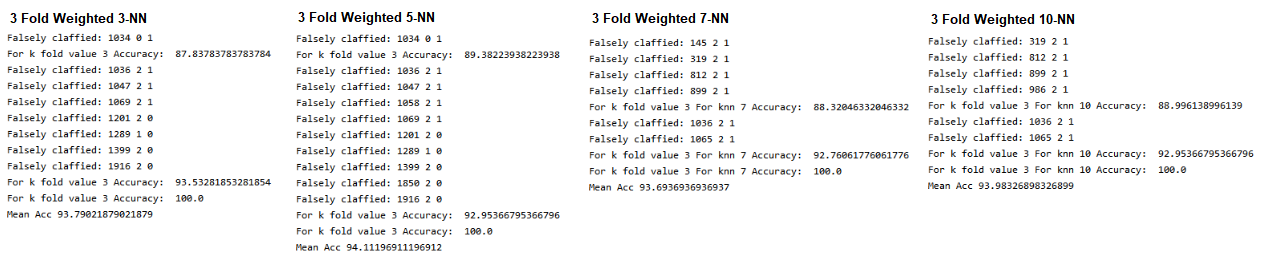

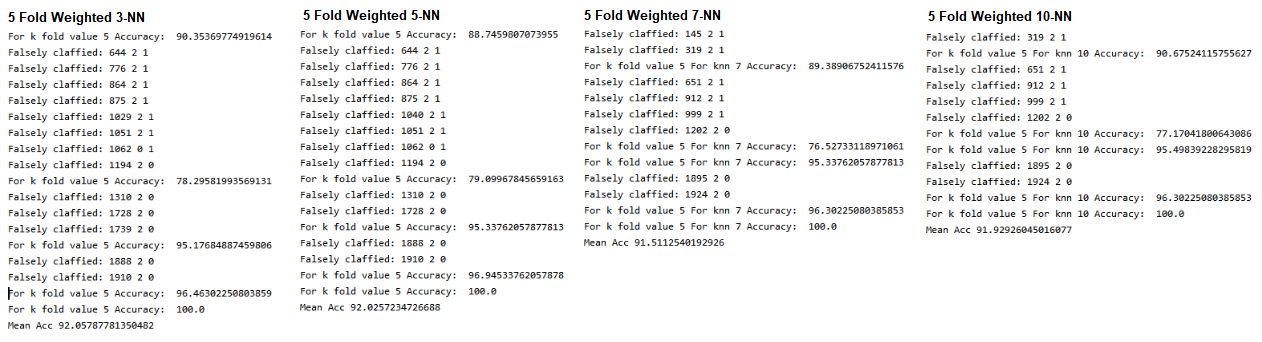

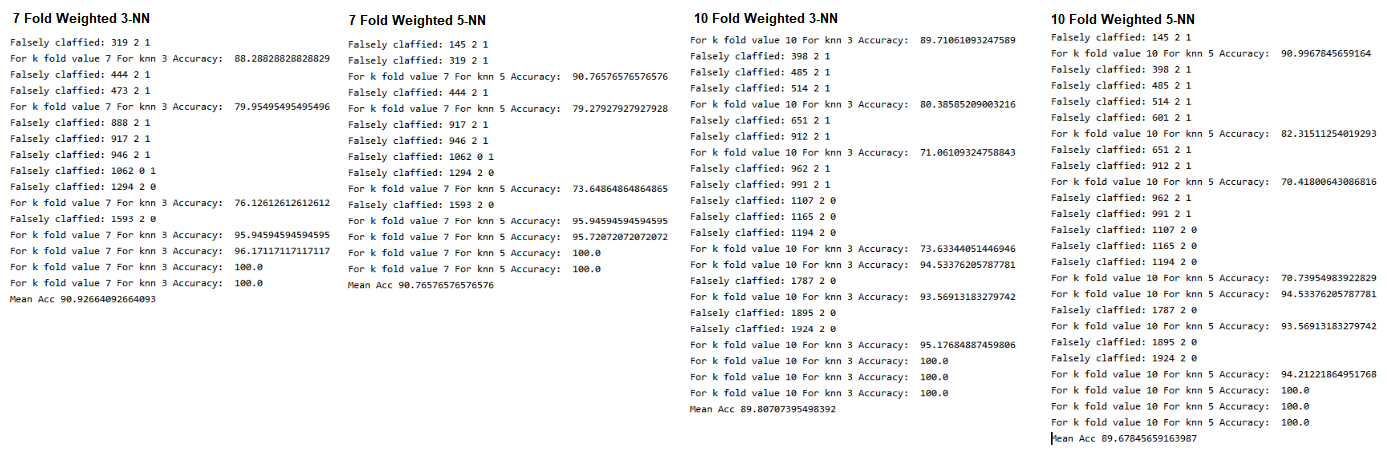

## Error Analysis

Overall Accuracy is good but it isn't good as Gabor.<br>
- For time complexity, compared to other features Tiny Images takes shortest time to extract features.<br><br>
About k-NN distance calculations looking at Accuracy values;<br><br>
- For a fixed k fold value if the k-NN's k value increases, Accuracy so slightly decreases but there is almost no difference.
- For a fixed k-NN k value if the k fold value increases, Accuracy slightly decreases.

About Weighted k-NN distance calculations looking at Accuracy values;<br><br>
- For a fixed k fold value if the k-NN's k value increases, Accuracy slightly decreases.
- For a fixed k-NN k value if the k fold value increases, Accuracy slightly decreases.

For this part Covid is labeled as 0, Normal 1, Viral Phenomia 2. It is also apparent that Tiny Images mostly confuses Viral Phenomia with Normal images. Since the images are grayscaled; when they become tiny, the images's texture become mostly similar. So that's why I think Tiny Image confuses them with each other.

For Tiny Images 3 Fold 5-NN looks optimum, weighted or not doesn't matter much.

## The Accuracy results of Canny Images:
**For each iteration and Mean Accuracy:**

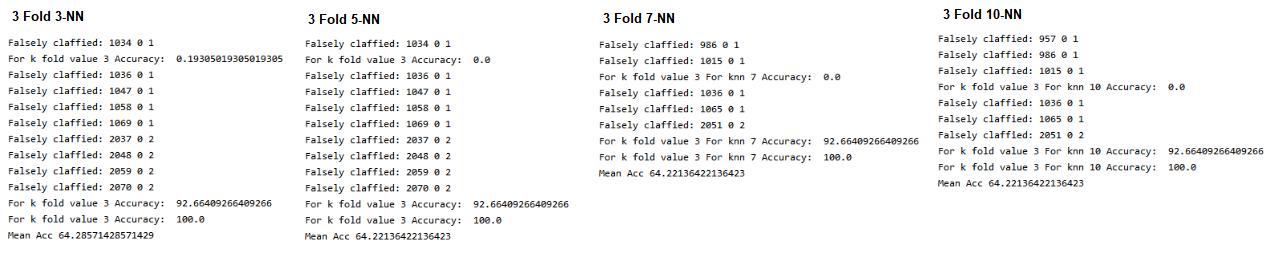

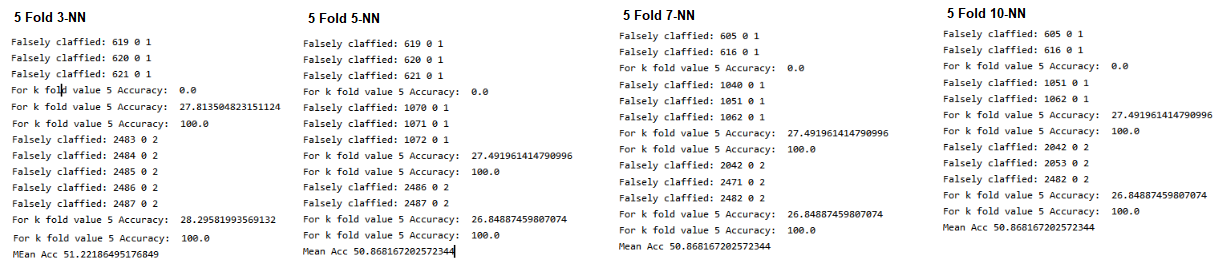

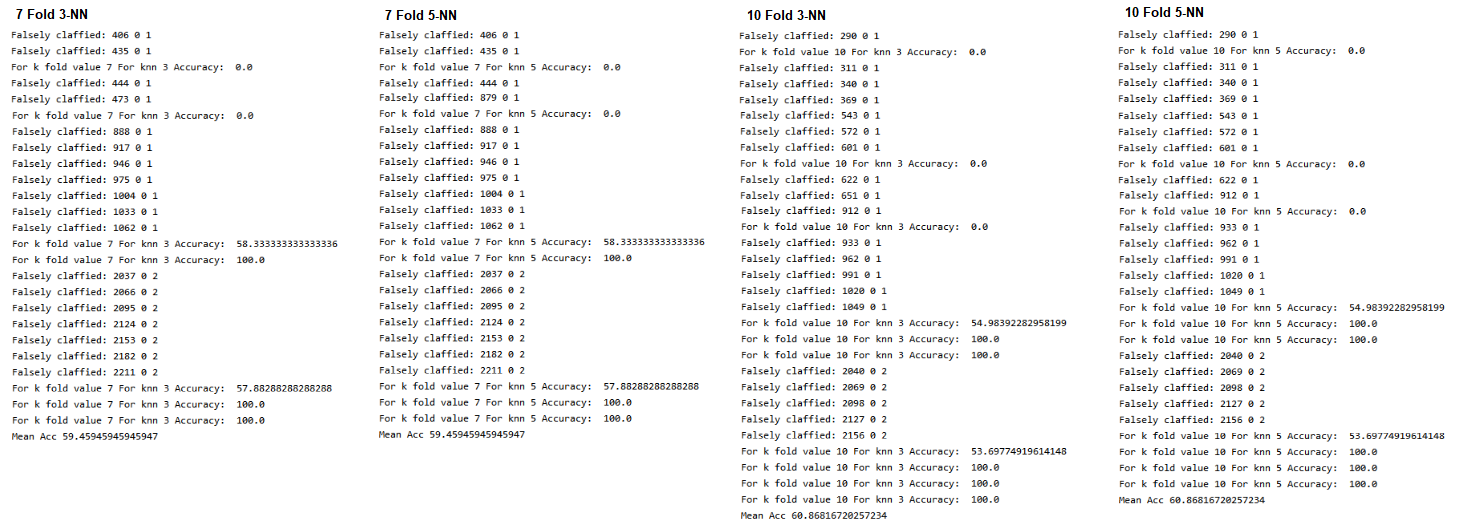

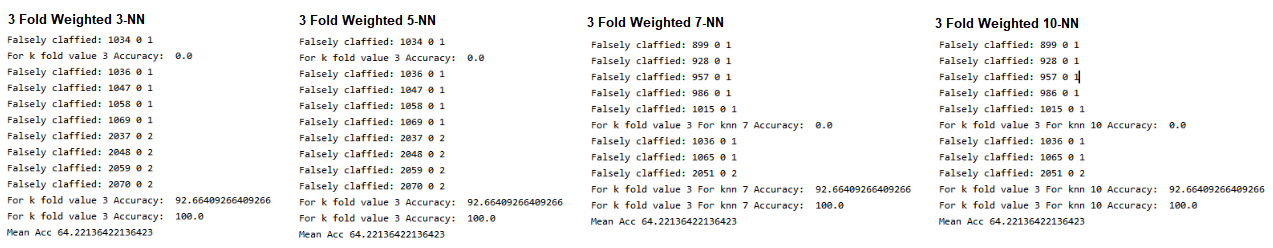

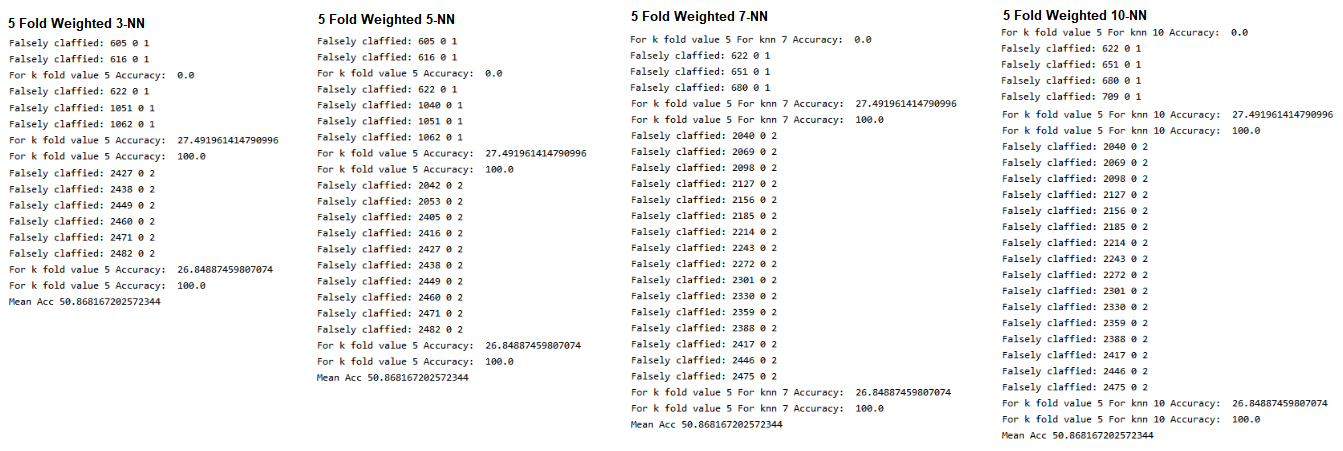

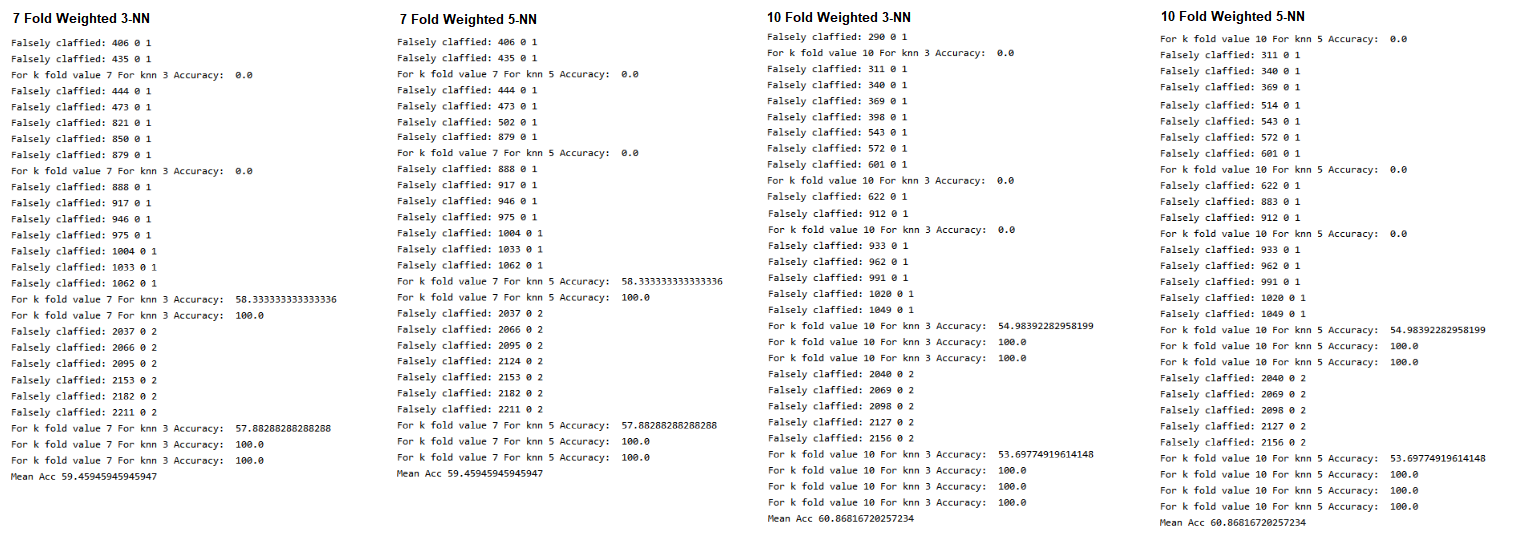

## Error Analysis

Overall Accuracy is bad compared to other features.<br>
- For time complexity, compared to other features Canny doesn't take longer than Gabor but it doesn't take shorter than Tiny Image to extract features.<br><br>
About k-NN distance calculations looking at Accuracy values;<br><br>
- For a fixed k fold value if the k-NN's k value increases, Accuracy has no difference to mention.
- For a fixed k-NN k value if the k fold value increases, Accuracy has some ups and downs but in the end it is decreased.

About Weighted k-NN distance calculations looking at Accuracy values;<br><br>
- For a fixed k fold value if the k-NN's k value increases, Accuracy has no difference.
- For a fixed k-NN k value if the k fold value increases, Accuracy has some ups and downs but in the end it is decreased.

For this part Covid is labeled as 0, Normal 1, Viral Phenomia 2. It is also apparent that Canny mostly confuses Covid with Normal images and Viral Phenomia with Normal images. Since the images are grayscaled; and the images always show rib cage, the shapes are almost the same. So that's why I think Canny confuses them with each other and doesn't have a good accuracy.

For Canny 3 Fold looks optimum but k-NN's value and whether it be weigthed or not doesn't matter.

# Conclusion

There is almost no difference between using k-NN or weighted k-NN for this problem.

For time complexity Tiny is better than Canny and Canny is better than Gabor.

#### Feature | Highest Mean Accuracy 
- Gabor | 97.02% <br>
- Canny | 64.26% <br>
- Tiny Image | 94.11% <br>

Therefore using Gabor with 3 fold 3-NN looks like the best option for this problem.